## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading and viewing files

In [3]:
train=pd.read_csv('train.csv')

In [4]:
test=pd.read_csv('test.csv')

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [9]:
train.groupby('location')['id'].count()

location
                          1
  Glasgow                 1
  Melbourne, Australia    1
  News                    1
  å_                      1
                         ..
å_: ?? ÌÑ ? : ?           1
å_å_Los Mina Cityã¢      1
å¡å¡Midwest Û¢Û¢        1
åÊ(?Û¢`?Û¢å«)??         1
åø\_(?)_/åø               1
Name: id, Length: 3341, dtype: int64

## Tweets distribution

In [10]:
train.groupby('target')['id'].count()

target
0    4342
1    3271
Name: id, dtype: int64

Not so imbalanced dataset.

In [11]:
import string

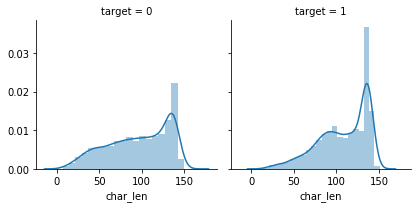

In [12]:
g=sns.FacetGrid(data=train,col='target')
train['char_len']=train['text'].str.len()
g.map(sns.distplot,'char_len')

Short tweets tend to be normal tweets regarding talking rather than reporting about disaster.


## Mostly used keywords

Text(0.5, 1.0, 'disaster tweets')

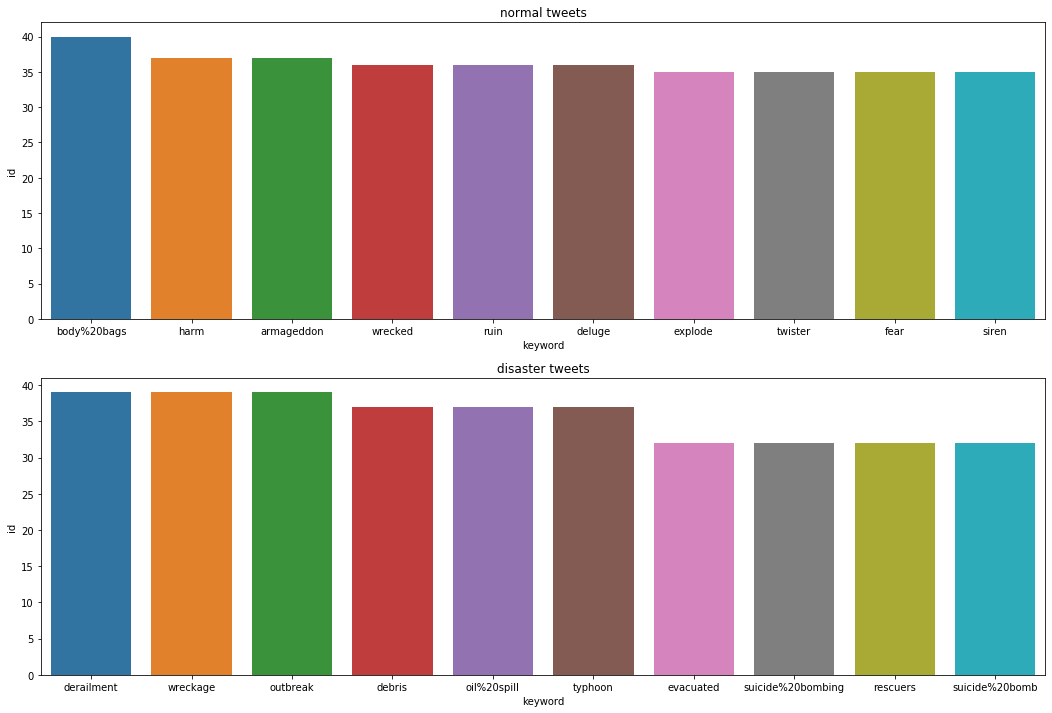

In [13]:
fig,axes=plt.subplots(2,1,figsize=(18,12))
temp=pd.DataFrame(train[train['target']==0].groupby('keyword')['id'].count())
temp.sort_values('id',ascending=False,inplace=True)
sns.barplot(temp.index[:10],temp['id'][:10],ax=axes[0]).set_title('normal tweets')
temp=pd.DataFrame(train[train['target']==1].groupby('keyword')['id'].count())
temp.sort_values('id',ascending=False,inplace=True)
sns.barplot(temp.index[:10],temp['id'][:10],ax=axes[1]).set_title('disaster tweets')


Keywords inform us about a disaster tweet to some extent.
Tweets in disaster category seem to be around train derailment, ship wreckage, disease outbreak, oil spillage, typhoon,suicide bombings etc.

## Hash Tags

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [16]:
import re

In [17]:
pattern= (r'\#(\w+)')
def hashtags(x):
    hash=[]
    for i in x:
        hash.append(re.findall(pattern,i))
    return hash    


In [18]:
ht_normal=hashtags(train[train['target']==0]['text'])

In [19]:
ht_disaster=hashtags(train[train['target']==1]['text'])

In [20]:
ht_regular= sum(ht_normal,[])

In [21]:
ht_disaster=sum(ht_disaster,[])

In [22]:
import nltk

In [29]:
dicti=nltk.FreqDist(ht_regular)

In [30]:
hash_reg=pd.DataFrame({'Hash':list(dicti.keys()),
                     'Count':list(dicti.values())})

In [31]:
hash_reg

,Hash,Count
0,metal,1
1,RT,7
2,mufc,2
3,nsfw,4
4,NowPlaying,10
...,...,...
1205,cnbc,1
1206,topnews,1
1207,whoops,1
1208,FX,1


In [32]:
regular=hash_reg.sort_values('Count',ascending=False)

Text(0.5, 1.0, 'disaster tweets')

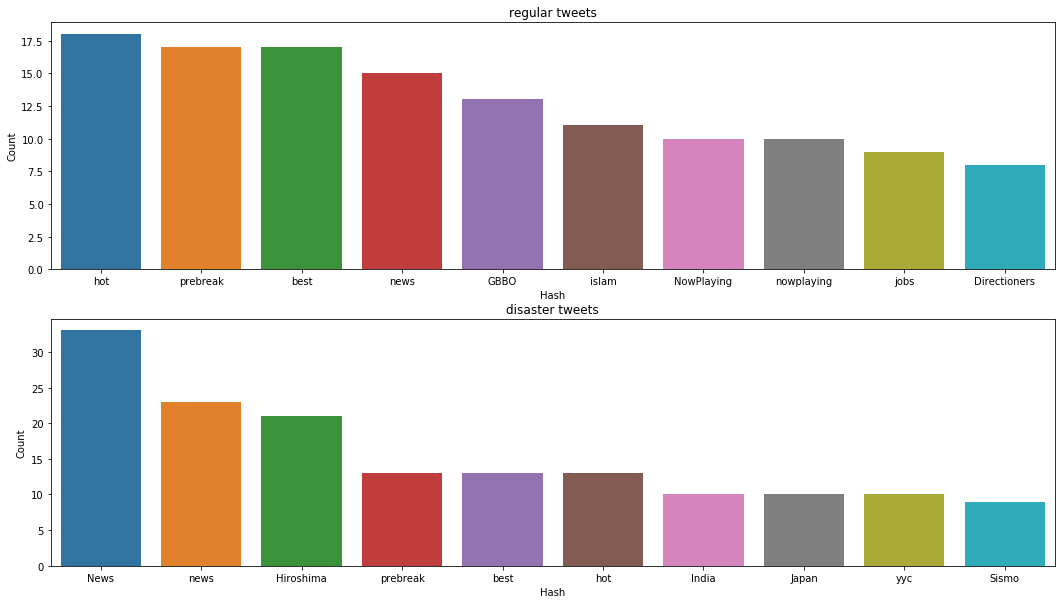

In [33]:
fig,axes=plt.subplots(2,1,figsize=(18,10))
sns.barplot(regular['Hash'][:10],regular['Count'][:10],ax=axes[0]).set_title('regular tweets')
dicti=nltk.FreqDist(ht_disaster)
hash_reg=pd.DataFrame({'Hash':list(dicti.keys()),
                       'Count':list(dicti.values())})
disaster=hash_reg.sort_values('Count',ascending=False)                       
sns.barplot(disaster['Hash'][:10],disaster['Count'][:10],ax=axes[1]).set_title('disaster tweets')


There are some places mentioned which may be linked to some disaster.

## Text Pre-processing

In [34]:
train.shape

(7613, 6)

In [35]:
test.shape

(3263, 4)

In [36]:
merge_df= train.append(test,ignore_index=True)

In [37]:
merge_df

,id,keyword,location,text,target,char_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0,69.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,38.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0,133.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0,65.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0,88.0
...,...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,NaN
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN,NaN
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN,NaN
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,NaN


In [38]:
merge_df.drop(['char_len'],axis=1,inplace=True)

In [39]:
merge_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
from nltk.corpus import stopwords

In [42]:
def text_process(x):
    no_punct= [char for char in x if char not in string.punctuation]
    no_punct=''.join(no_punct)
    no_stop= [word for word in no_punct.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(no_stop)

In [43]:
merge_df['text']=merge_df['text'].apply(lambda x:text_process(x))

In [44]:
merge_df['text']

0             Deeds Reason earthquake May ALLAH Forgive us
1                    Forest fire near La Ronge Sask Canada
2        residents asked shelter place notified officer...
3        13000 people receive wildfires evacuation orde...
4        got sent photo Ruby Alaska smoke wildfires pou...
                               ...                        
10871    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10872    Storm RI worse last hurricane cityamp3others h...
10873      Green Line derailment Chicago httptcoUtbXLcBIuY
10874    MEG issues Hazardous Weather Outlook HWO httpt...
10875    CityofCalgary activated Municipal Emergency Pl...
Name: text, Length: 10876, dtype: object

## Tokenizing and Stemming

In [45]:
from nltk.stem import WordNetLemmatizer

In [56]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [58]:
lemmatizer= WordNetLemmatizer()

In [59]:
from nltk.tokenize import word_tokenize

In [60]:
def tokenize_stem(text):
    tokens= word_tokenize(text)
    stem_words=[]
    for i in tokens:
        stem_words.append(lemmatizer.lemmatize(i))
    final=' '.join(stem_words)
    return final

In [65]:
merge_df['text']= merge_df['text'].apply(lambda x: tokenize_stem(x))

In [66]:
merge_df['text']

0              Deeds Reason earthquake May ALLAH Forgive u
1                    Forest fire near La Ronge Sask Canada
2        resident asked shelter place notified officer ...
3        13000 people receive wildfire evacuation order...
4        got sent photo Ruby Alaska smoke wildfire pour...
                               ...                        
10871    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10872    Storm RI worse last hurricane cityamp3others h...
10873      Green Line derailment Chicago httptcoUtbXLcBIuY
10874    MEG issue Hazardous Weather Outlook HWO httptc...
10875    CityofCalgary activated Municipal Emergency Pl...
Name: text, Length: 10876, dtype: object

## TF-IDF

In [67]:
tfidf=TfidfVectorizer(min_df=2,max_df=0.9,max_features=300,stop_words='english')

In [68]:
tfidf=tfidf.fit_transform(merge_df['text'])

In [70]:
tfidf.shape

(10876, 300)

## Model Building

In [71]:
final_train=tfidf[:7613]
final_test=tfidf[7613:]

In [72]:
X= final_train
y=merge_df[:7613]['target']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_valid,y_train,y_valid= train_test_split(X,y,test_size=0.2)

### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lr= LogisticRegression()
param={'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter':[50,100,200,300,400]}

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
grid_lr= GridSearchCV(lr,param,verbose=True,cv=3)

In [79]:
grid_lr.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [50, 100, 200, 300, 400],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [81]:
lr=grid_lr.best_estimator_

In [82]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
pred_lr=lr.predict(X_valid)

In [93]:
from sklearn.metrics import f1_score,confusion_matrix

In [88]:
f1_lr=f1_score(y_valid,pred_lr)

In [96]:
print('f1_score for logistic regression is:',f1_lr*100,'%')
print('\nconfusion matrix:\n',confusion_matrix(y_valid,pred_lr))

f1_score for logistic regression is: 68.27586206896552 %

confusion matrix:
 [[759 137]
 [231 396]]


### Naive Bayes

In [90]:
from sklearn.naive_bayes import MultinomialNB

In [91]:
nb= MultinomialNB()

In [92]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [97]:
pred_nb= nb.predict(X_valid)

In [98]:
f1_nb=f1_score(y_valid,pred_nb)

In [99]:
print('f1_score for Naive Bayes is:',f1_nb*100,'%')
print('\nconfusion matrix:\n',confusion_matrix(y_valid,pred_nb))

f1_score for Naive Bayes is: 67.54617414248021 %

confusion matrix:
 [[770 126]
 [243 384]]


### SVM

In [100]:
from sklearn.svm import SVC

In [101]:
svc= SVC()
param={'gamma' : [1,0.1,0.01,0.001,0.0001],'C':[0.1,1,10,100,1000]}

In [103]:
grid_svc=GridSearchCV(svc,param,cv=3,verbose=True)

In [104]:
grid_svc.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [106]:
svc=grid_svc.best_estimator_

In [107]:
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_valid)

In [109]:
f1_svc=f1_score(y_valid,pred_svc)

In [112]:
print('f1 score for SVC is:',f1_svc*100,'%')
print('\nconfusion matrix:\n',confusion_matrix(y_valid,pred_svc))

f1 score for SVC is: 67.06792777300087 %

confusion matrix:
 [[750 146]
 [237 390]]


## Evaluating Model Performances

In [113]:
model_performances=pd.DataFrame({'model':['LogisticRegression','MultinomialNB','SVC'],
                                'F1_score':[f1_lr,f1_nb,f1_svc]})

In [115]:
model_performances.sort_values(by='F1_score',ascending=False)

,model,F1_score
0,LogisticRegression,0.682759
1,MultinomialNB,0.675462
2,SVC,0.670679


## Final Submission

In [116]:
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
pred=lr.predict(final_test)

In [121]:
test['target']=pred

In [123]:
final_submission= test[['id','target']]

In [124]:
final_submission

,id,target
0,0,1.0
1,2,1.0
2,3,1.0
3,9,1.0
4,11,1.0
...,...,...
3258,10861,1.0
3259,10865,1.0
3260,10868,1.0
3261,10874,1.0


In [125]:
final_submission.to_csv('submission.csv',index=False)